In [5]:
import numpy as np

import scipy.integrate
import scipy.interpolate
import scipy.io

import bokeh.models
import bokeh.plotting
import bokeh.io

import matplotlib.pyplot as plt
import torch
from esn import esn

In [38]:
t0=0
n=1
t_step = np.arange(t0, t0+tau, dt)
tck = [scipy.interpolate.splrep(t_step, np.random.normal(size=(1000,1))) for i in range(n)]
foo = np.array([scipy.interpolate.splev(t, tck[i]) for i in range(n)])

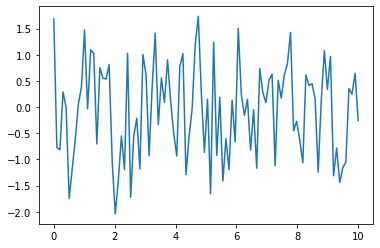

array([ 1.68328992, -0.77187551, -0.81608949,  0.29054953, -0.00655452,
       -1.74696056, -1.17891283, -0.60589209,  0.06350445,  0.38611953,
        1.47310932, -0.03581892,  1.09377487,  1.02592286, -0.70438662,
        0.75499639,  0.55017251,  0.53812781,  0.8146382 , -1.04098055,
       -2.04210062, -1.39058787, -0.55184109, -1.19204337,  1.02681257,
       -1.72493417, -0.55381528, -0.21204937, -1.18390833,  1.00268628,
        0.61999635, -0.93429435,  0.39242624,  1.41209486, -0.33637289,
        0.55839947,  0.09114721,  0.90355536,  0.12240071, -0.50275011,
       -0.93552231,  0.77574499,  1.02233306, -1.29240279, -0.56300265,
       -0.0351051 ,  1.19516602,  1.73668212,  0.25892558, -0.86614008,
        0.15194723, -1.65651456,  1.24103225, -0.92335598,  0.18841044,
       -1.41260158, -0.60408934, -1.19475242,  0.13088474, -0.66410183,
        1.50392062,  0.24319134, -0.15834542,  0.14820674, -0.82233413,
       -0.05307386, -1.16785562,  0.73767832,  0.27608879,  0.08

In [50]:
t = np.linspace(0,10,100)
x = np.random.normal(size=(100,))

plt.plot(t, x)
plt.show()

tck = scipy.interpolate.splrep(t, x)
x_past = scipy.interpolate.splev(t, tck)
x_past

In [30]:
fn_pref = 'mackey_glass_beta_2_gamma_1_n_9.65_tau_2_n_samples_500_n_steps_4000_dt_0.01'
mat = scipy.io.loadmat(fn_pref + '.mat')
foo = np.real(mat['time_series'])

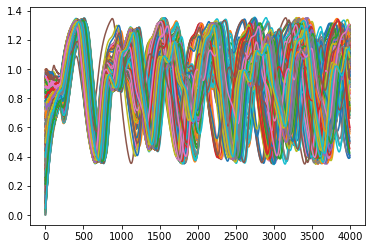

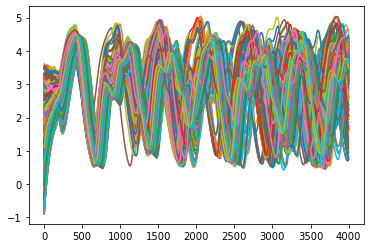

In [31]:
n_samples = 500
for i in range(n_samples):
    plt.plot(foo[i,:])
plt.show()

foo_mean = foo.mean(axis=1).reshape(n_samples,1)
foo_std = np.std(foo, axis=1).reshape(n_samples,1)

bar = (foo / foo_std) - foo_mean
for i in range(n_samples):
    plt.plot(bar[i,:])
plt.show()

target_dir = '/home/spate/Res/targets/'
np.savetxt(target_dir + fn_pref + '.csv', foo, delimiter=',')